In [9]:
import numpy as np
import pandas as pd
import glob
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import scipy.interpolate

In [10]:
from itertools import chain

def draw_map(m, scale=0.7):
    # draw a shaded-relief image
#     m.bluemarble(scale=scale)
    m.shadedrelief()
    
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [11]:
import pandas as pd
import geopandas as gpd
geo_df=pd.read_csv('ghcnm_out/Correlated Data/Monthly_Correlated_Data.csv')
newseries=(geo_df.iloc[:,6]+geo_df.iloc[:,7]+geo_df.iloc[:,8]+geo_df.iloc[:,9]+geo_df.iloc[:,10]+geo_df.iloc[:,11]+geo_df.iloc[:,12]+geo_df.iloc[:,13]+geo_df.iloc[:,14]+geo_df.iloc[:,15]+geo_df.iloc[:,16]+geo_df.iloc[:,17])/12.0
print(geo_df)

      Unnamed: 0         Code  Latitude  Longitude  Elevation  \
0              0  CA002100100   61.6500  -137.4833      966.0   
1              1  CA002100115   60.4667  -134.8333      820.0   
2              2  CA002100120   62.3667  -133.3833     1158.0   
3              3  CA002100160   62.4167  -140.8667      649.0   
4              4  CA002100163   60.0000  -136.7667      836.0   
...          ...          ...       ...        ...        ...   
1830        1830  USW00027502   71.2833  -156.7814        9.4   
1831        1831  USW00027503   70.6392  -159.9950        9.1   
1832        1832  USW00027515   70.2117  -151.0017       17.4   
1833        1833  USW00027516   71.3214  -156.6111        4.6   
1834        1834  XXXLT199633   62.0000   -33.0000     9999.0   

                       Name  Correlation1  Correlation2  Correlation3  \
0                AISHIHIK_A     -0.056648     -0.383037      0.032376   
1       ANNIE_LAKE_ROBINSON      0.249292     -0.496984     -0.278545   


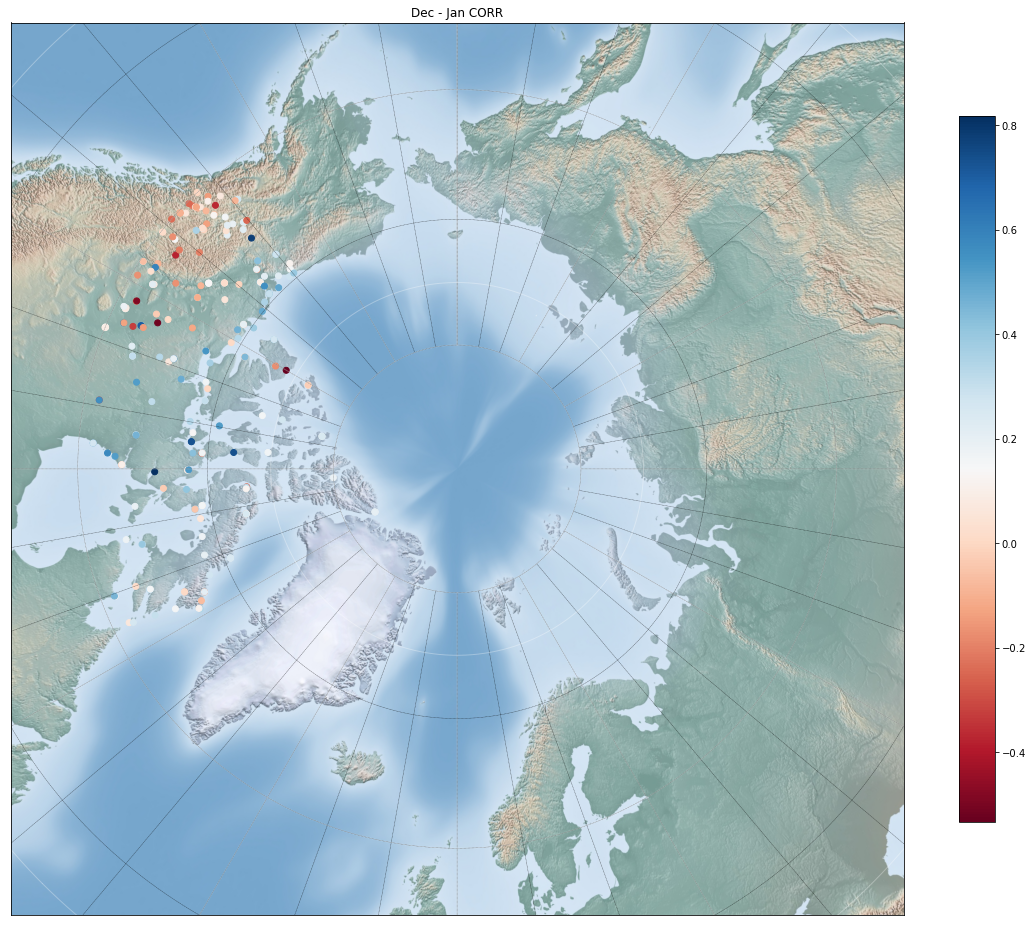

In [14]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
# new_df=(geo_df[(geo_df.iloc[:230,17]>0.5) | (geo_df.iloc[:230,17]<-0.5)])
x, y = m(geo_df.iloc[:230,3], geo_df.iloc[:230,2])
col = geo_df.iloc[:230,17]
plt.scatter(x, y, c=col, cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('Dec - Jan CORR')
draw_map(m)

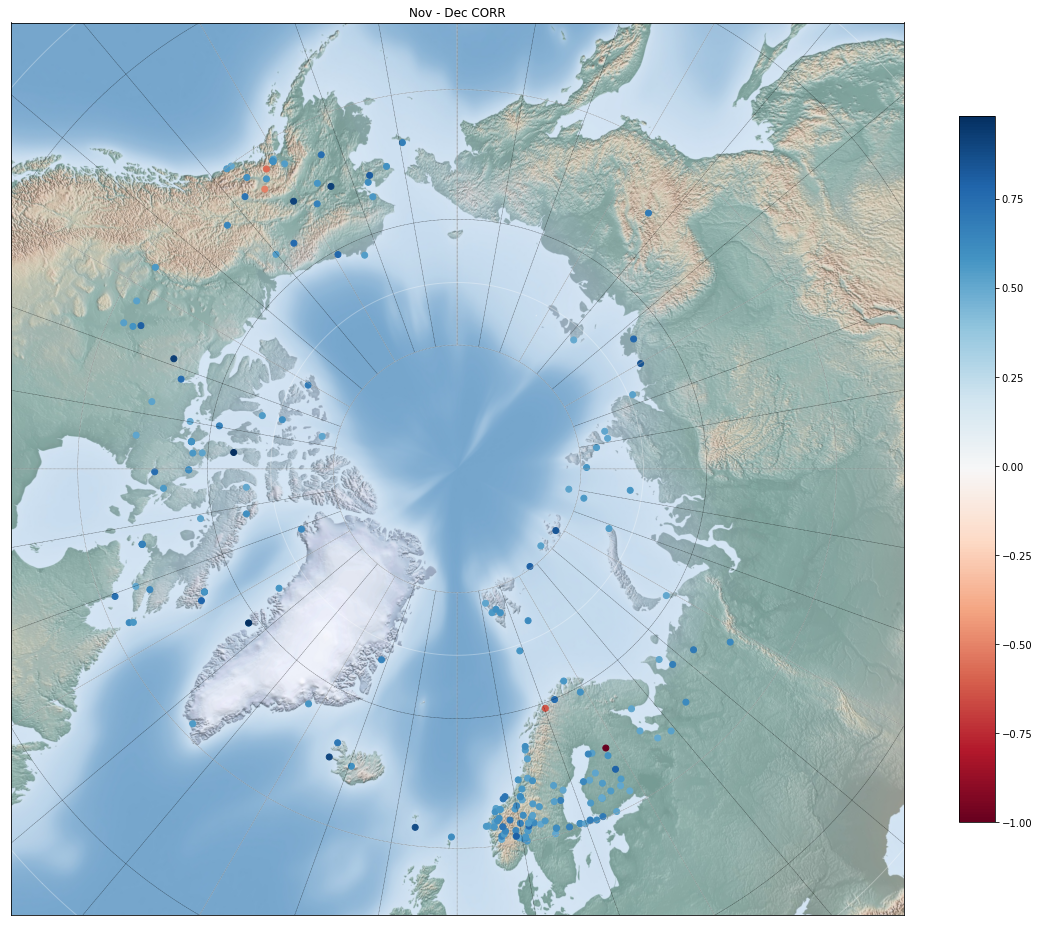

In [15]:
new_df=(geo_df[(geo_df.iloc[:,17]>0.5) | (geo_df.iloc[:,17]<-0.5)])
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
new_df=(geo_df[(geo_df.iloc[:,16]>0.5) | (geo_df.iloc[:,16]<-0.5)])
x, y = m(new_df.iloc[:,3], new_df.iloc[:,2])
plt.scatter(x, y, c=new_df.iloc[:,16], cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('Nov - Dec CORR')
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
new_df=(geo_df[(geo_df.iloc[:,15]>0.5) | (geo_df.iloc[:,15]<-0.5)])
x, y = m(new_df.iloc[:,3], new_df.iloc[:,2])
plt.scatter(x, y, c=new_df.iloc[:,15], cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('Oct - Nov CORR')
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
new_df=(geo_df[(geo_df.iloc[:,14]>0.5) | (geo_df.iloc[:,14]<-0.5)])
x, y = m(new_df.iloc[:,3], new_df.iloc[:,2])
plt.scatter(x, y, c=new_df.iloc[:,14], cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('Sept - Oct CORR')
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
new_df=(geo_df[(geo_df.iloc[:,13]>0.5) | (geo_df.iloc[:,13]<-0.5)])
x, y = m(new_df.iloc[:,3], new_df.iloc[:,2])
plt.scatter(x, y, c=new_df.iloc[:,13], cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('Aug - Sept CORR')
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
new_df=(geo_df[(geo_df.iloc[:,12]>0.5) | (geo_df.iloc[:,12]<-0.5)])
x, y = m(new_df.iloc[:,3], new_df.iloc[:,2])
plt.scatter(x, y, c=new_df.iloc[:,12], cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('July - Aug CORR')
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
new_df=(geo_df[(geo_df.iloc[:,11]>0.5) | (geo_df.iloc[:,11]<-0.5)])
x, y = m(new_df.iloc[:,3], new_df.iloc[:,2])
plt.scatter(x, y, c=new_df.iloc[:,11], cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('June - July CORR')
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
new_df=(geo_df[(geo_df.iloc[:,10]>0.5) | (geo_df.iloc[:,10]<-0.5)])
x, y = m(new_df.iloc[:,3], new_df.iloc[:,2])
plt.scatter(x, y, c=new_df.iloc[:,10], cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('May - June CORR')
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
new_df=(geo_df[(geo_df.iloc[:,9]>0.5) | (geo_df.iloc[:,9]<-0.5)])
x, y = m(new_df.iloc[:,3], new_df.iloc[:,2])
plt.scatter(x, y, c=new_df.iloc[:,9], cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('April - May CORR')
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
new_df=(geo_df[(geo_df.iloc[:,8]>0.5) | (geo_df.iloc[:,8]<-0.5)])
x, y = m(new_df.iloc[:,3], new_df.iloc[:,2])
plt.scatter(x, y, c=new_df.iloc[:,8], cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('March - Apr CORR')
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
new_df=(geo_df[(geo_df.iloc[:,7]>0.5) | (geo_df.iloc[:,7]<-0.5)])
x, y = m(new_df.iloc[:,3], new_df.iloc[:,2])
plt.scatter(x, y, c=new_df.iloc[:,7], cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('Feb - March CORR')
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
new_df=(geo_df[(geo_df.iloc[:,6]>0.5) | (geo_df.iloc[:,6]<-0.5)])
x, y = m(new_df.iloc[:,3], new_df.iloc[:,2])
plt.scatter(x, y, c=new_df.iloc[:,6], cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('Jan - Feb CORR')
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
m.drawparallels(np.arange(-80.,81.,10.),  linewidth=0.4)
m.drawmeridians(np.arange(-180.,181.,10.),  linewidth=0.4)
newseries=(geo_df.iloc[:,6]+geo_df.iloc[:,7]+geo_df.iloc[:,8]+geo_df.iloc[:,9]+geo_df.iloc[:,10]+geo_df.iloc[:,11]+geo_df.iloc[:,12]+geo_df.iloc[:,13]+geo_df.iloc[:,14]+geo_df.iloc[:,15]+geo_df.iloc[:,16]+geo_df.iloc[:,17])/12.0
x, y = m(geo_df.iloc[:,3], geo_df.iloc[:,2])
col = geo_df.iloc[:,17]
plt.scatter(x, y, c=newseries, cmap='RdBu', marker='o')
plt.colorbar(shrink=0.65)
plt.title('Annual Mean CORR')
draw_map(m)